<a href="https://colab.research.google.com/github/akashgardas/Data-Science/blob/main/KNN/Classification_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN Classifier
Data: Sample data


In [43]:
# Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### 1. Sample Data (10 Patients)

- Columns: [Glucose, BloodPressure, BMI]
- Target: 1 - At risk of diabetes, 0 - not at risk of diabetes

In [73]:
data = {
    'Glucose':        [95, 105, 110, 120, 130, 150, 160, 170, 180, 200],
    'BloodPressure':  [70, 75, 78, 80, 82, 88, 90, 92, 95, 100],
    'BMI':            [22, 23, 24, 25, 26, 30, 31, 32, 34, 36],
    'DiabetesRisk':   [0,   0,   0,   0,   0,   1,   1,   1,   1,   1]
}

df = pd.DataFrame(data)
df

,Glucose,BloodPressure,BMI,DiabetesRisk
0,95,70,22,0
1,105,75,23,0
2,110,78,24,0
3,120,80,25,0
4,130,82,26,0
5,150,88,30,1
6,160,90,31,1
7,170,92,32,1
8,180,95,34,1
9,200,100,36,1


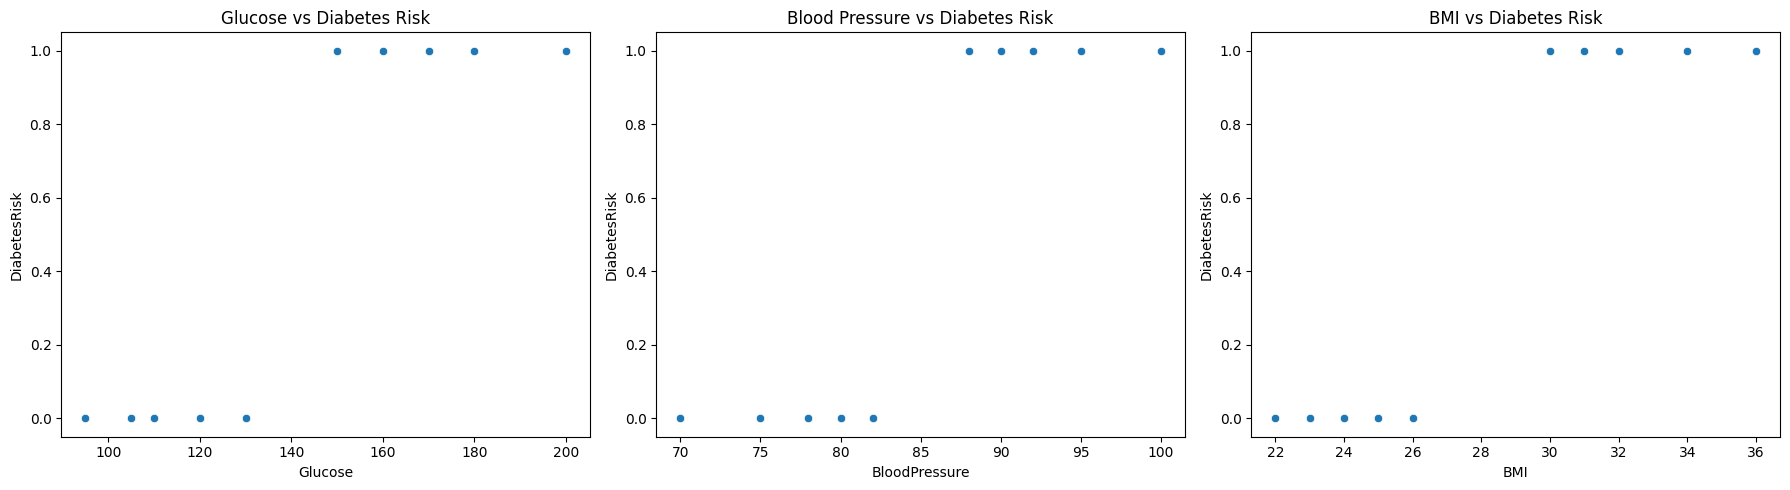

In [44]:
# scatter plots for each feature against DiabetesRisk
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(ax=axes[0], x='Glucose', y='DiabetesRisk', data=df)
axes[0].set_title('Glucose vs Diabetes Risk')

sns.scatterplot(ax=axes[1], x='BloodPressure', y='DiabetesRisk', data=df)
axes[1].set_title('Blood Pressure vs Diabetes Risk')

sns.scatterplot(ax=axes[2], x='BMI', y='DiabetesRisk', data=df)
axes[2].set_title('BMI vs Diabetes Risk')

plt.tight_layout()
plt.show()

### Interpretation
From the above graphs, it can be seen that higher the Glucose, Blood Pressure, and BMI, the higher the chances of Diabetes Risk

### 2. Split Features (X) and Target (y)

In [72]:
X = df[['Glucose', 'BloodPressure', 'BMI']]
y = df['DiabetesRisk']

### 3. Train - Test Split (Learning, Validation, Testing)

Training : 70%
Testing : 30%

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (7, 3)
X_test shape: (3, 3)
y_train shape: (7,)
y_test shape: (3,)


### 4. Feature Scaling

In [70]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 5. Model Training (Learning Phase)

In [69]:
knn = KNeighborsClassifier(n_neighbors=5)   # k = 5
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

### 6. Prediction & Validation

In [68]:
y_pred = knn.predict(X_test_scaled)

### 7. Evaluation

In [62]:
# Confusion Matrix
print(confusion_matrix(y_test, y_pred))

[[1 0]
 [1 1]]


In [64]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



In [65]:
# Accuracy Score
print(accuracy_score(y_test, y_pred))

0.6666666666666666


### 8. Predicting for a new tuple (Test Tuple)
Ex: Glucose = 172, BloodPressure = 92, BMI = 32

In [67]:
new_patient = np.array([[172, 92, 32]])
new_patient_scaled = scaler.transform(new_patient)

prediction = knn.predict(new_patient_scaled)
print(f'Prediction: {prediction}')

Prediction: [1]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
